### loading image and converting it to grayscale

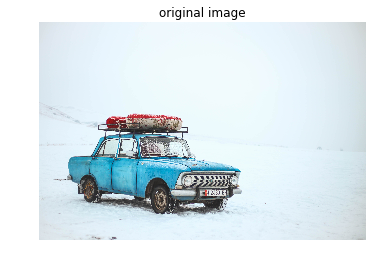

In [50]:
from skimage.io import imread
import matplotlib.pyplot as plt
import numpy as np

orig_img = imread('resources/auto.jpg')
plt.title("original image")
plt.axis('off') 
plt.imshow(orig_img)

### Method 1: The lightness method 
This method averages the most prominent and least prominent colors: (max(R, G, B) + min(R, G, B)) / 2.

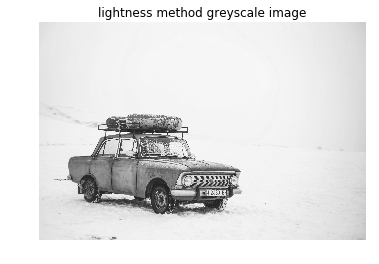

In [48]:
grey_light = np.copy(orig_img)
grey_light[:] = np.max(grey_light,axis=-1,keepdims=1)/2 + np.min(grey_light,axis=-1,keepdims=1)/2
plt.title("lightness method greyscale image")
plt.axis('off') 
plt.imshow(grey_light)

### Method 2: The average method
This method simply averages the values: (R + G + B) / 3

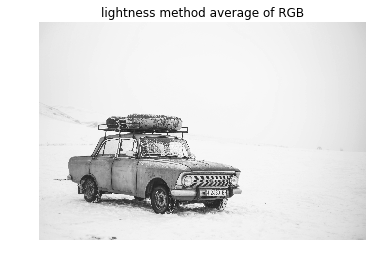

In [53]:
grey_avg = np.copy(orig_img)
grey_avg[:] = np.sum(grey_avg,axis=-1,keepdims=1)/3
plt.title("lightness method average of RGB")
plt.axis('off') 
plt.imshow(grey_avg)

### Method 3: The luminosity method 
This is a more sophisticated version of the average method. It also averages the values, but it forms a weighted average to account for human perception. We're more sensitive to green than other colors, so green is weighted most heavily. The formula for luminosity is 0.21 R + 0.72 G + 0.07 B.

In [160]:
grey_lumin = np.copy(orig_img)
luminosity_constant = [0.21,0.72,0.07]
grey_lumin[:] = np.tensordot(grey_lumin, luminosity_constant,axes=((-1,-1)))
plt.title("lightness method average of RGB")
plt.axis('off') 
# plt.imshow(grey_lumin)

ValueError: could not broadcast input array from shape (3396,5094) into shape (3396,5094,3)

In [101]:
##0.21 R + 0.72 G + 0.07 B
print orig_img.shape
sar = np.copy(orig_img)
sar = sar.reshape((3396, 5094 * 3))

sar[:] = np.dot(sar, np.array([0.21,0.72,0.07])).reshape((3396,5094))
# print np.dot(sar, np.array([0.21,0.72,0.07]))
print sar

(3396, 5094, 3)


ValueError: shapes (3396,15282) and (3,) not aligned: 15282 (dim 1) != 3 (dim 0)

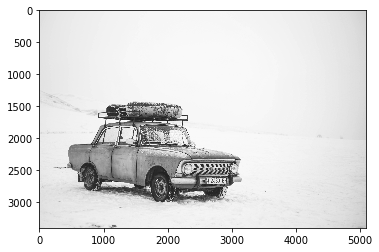

In [166]:
reshaped = orig_img.reshape((3396, 5094 * 3))
# print reshaped.reshape(3396, 5094, 3)

# # print resh.reshape((3396, 5094 , 3))
# sar = np.copy(resh)
# a1, a2, a3 = sar.shape
# reshaped = sar.reshape()
luminosity_constant = [0.21,0.72,0.07]
# print reshaped.shape

# print np.tensordot(orig_img, np.array([0.21,0.72,0.07]))
# print reshaped.shape
# print sar.reshape(a1,a2,a3)
# print np.dot(orig_img[...,:3], luminosity_constant)
# plt.imshow(np.dot(orig_img[...,:3], luminosity_constant))

W_mean = np.tensordot(orig_img,luminosity_constant, axes=((-1,-1)))[...,None]
orig_img[:] = W_mean.astype(orig_img.dtype)
plt.imshow(orig_img)